In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

In [2]:
train_dir = './train'
test_dir = './test'

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True
)

Found 11879 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [4]:
#model = load_model('models/model.h5')
model = load_model('models/14_cnn.h5')

In [5]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

In [6]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False  # No mezclar el orden
)


Found 2000 images belonging to 2 classes.


In [7]:
# Obtener predicciones (probabilidades) en el conjunto de prueba
Y_pred = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size)
y_pred = np.argmax(Y_pred, axis=1)

c:\Users\mglez\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 140ms/step


In [8]:
# Etiquetas verdaderas del conjunto de prueba
y_true = test_generator.classes[:len(y_pred)]  # Asegúrate de que las etiquetas coinciden en tamaño

In [9]:
# Binarizar las etiquetas verdaderas para la curva ROC (necesitamos las etiquetas en formato binario)
y_true_bin = label_binarize(y_true, classes=[0, 1])

## Matriz de confusión

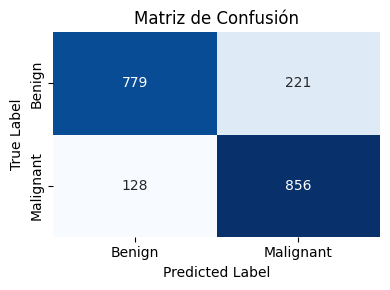

In [10]:
# --- MATRIZ DE CONFUSIÓN ---
cm = confusion_matrix(y_true, y_pred)

# Graficar la matriz de confusión con un tamaño más pequeño
plt.figure(figsize=(4, 3))  # Ajusta el tamaño de la figura
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.title('Matriz de Confusión')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()  # Asegura que todos los elementos se ajusten bien en la figura
plt.show()

## Curva ROC

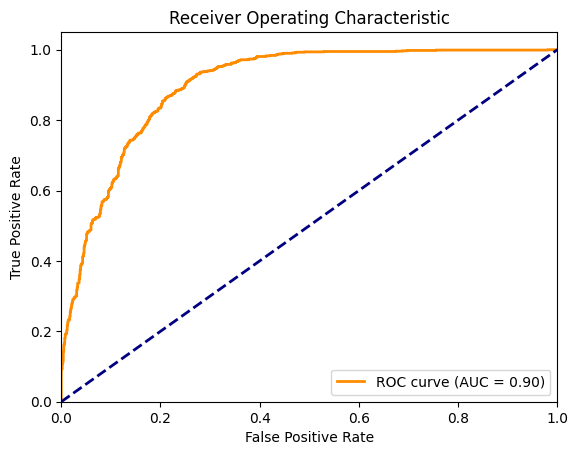

In [11]:
# Para calcular la curva ROC, tomamos la columna de la clase positiva (probabilidades de la clase 1)
fpr, tpr, thresholds = roc_curve(y_true_bin, Y_pred[:, 1])
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()